# Research Question:

### What is the relationship between the number of tests conducted and the confirmed COVID-19 cases for different countries
-We expect to see a positive relationship between these two variables. That is, if the number of tests conducted increase, the number of confirmed cases will increase. 

In [18]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import plotly.express as px
from scipy.stats import linregress

In [19]:
# File to Load 
# Read CSV file into DataFrame df
covid_df = pd.read_csv('Resources/owid-covid-data.csv')
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [20]:
#size of the data frame
covid_df.shape

(116565, 62)

In [21]:
#columns extracted 
updated_covid_df=covid_df[['location','total_cases','total_tests']]
updated_covid_df.head()

,location,total_cases,total_tests
0,Afghanistan,5.0,NaN
1,Afghanistan,5.0,NaN
2,Afghanistan,5.0,NaN
3,Afghanistan,5.0,NaN
4,Afghanistan,5.0,NaN


In [22]:
#remove all the NaN values 
#clean dataset
clean_covid_df = updated_covid_df.dropna(inplace=False)
clean_covid_df.head()

,location,total_cases,total_tests
1160,Albania,2.0,77.0
1161,Albania,10.0,114.0
1162,Albania,12.0,157.0
1163,Albania,23.0,298.0
1164,Albania,33.0,457.0


In [23]:
#size of the clean data frame
clean_covid_df.shape

(50039, 3)

In [24]:
#sort the total_cases in descending order
cases_df=clean_covid_df.groupby(["location"], sort=False)['total_cases'].max()
cases_df

location
Albania                  132459.0
Andorra                   15069.0
Antigua and Barbuda        1266.0
Argentina               5211801.0
Armenia                  246410.0
                          ...    
United States          39909618.0
Uruguay                  386410.0
Vietnam                  550996.0
Zambia                   207442.0
Zimbabwe                 126056.0
Name: total_cases, Length: 128, dtype: float64

In [25]:
#dataframe according to the sorted(descending) total_cases
idx = clean_covid_df.groupby(["location"])['total_cases'].transform(max) == clean_covid_df['total_cases']
cases_tests_df=clean_covid_df[idx]
cases_tests_df

,location,total_cases,total_tests
1621,Albania,132459.0,737014.0
2834,Andorra,15069.0,210856.0
4091,Antigua and Barbuda,1266.0,16700.0
4769,Argentina,5211801.0,13566184.0
5332,Armenia,246410.0,1588480.0
...,...,...,...
111070,United States,39909618.0,536925419.0
111626,Uruguay,386410.0,3424238.0
114185,Vietnam,550996.0,18111288.0
116016,Zambia,207442.0,2326129.0


In [26]:
#Data Visualization
#create a scatterplot using plotly 
#use log scale for both axes as total_tests and total_cases values are huge
fig = px.scatter(cases_tests_df, x="total_cases", y="total_tests", log_x=True,log_y=True,
                 hover_name="location", hover_data=["total_cases", "total_tests"],trendline="ols",
                 color="location",title="Log-transformed Total COVID-19 tests conducted vs. Confirmed cases",
                 labels={
                     "total_cases": "Total confirmed cases of COVID-19",
                     "total_tests": "Total tests",
                     "location": "Country",
                 })

fig.show()

From the plot above, we can observe that there are a positive linear relationship between the total tests conducted and the confirmed cases for different countries. 

The r-squared is: 0.6614401327161583


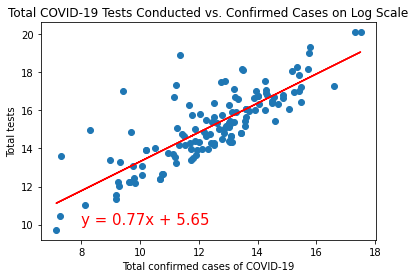

In [27]:
# Add the linear regression equation and line to plot
x_values = cases_tests_df['total_cases']
log_x_values=np.log(x_values)

y_values = cases_tests_df['total_tests']
log_y_values=np.log(y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(log_x_values, log_y_values)
regress_values = log_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

ax=plt.scatter(log_x_values,log_y_values)

plt.plot(log_x_values,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.title('Total COVID-19 Tests Conducted vs. Confirmed Cases on Log Scale')
plt.xlabel('Total confirmed cases of COVID-19')
plt.ylabel('Total tests')
plt.savefig('Outputs_HL/tests_confirmedcases_Plot.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

From the calculated r-squared value 0.66, we can conclude that 66% of the data fit the regression model.

In [28]:
#Pearson Correlation Coefficient test
corr_tests_cases=cases_tests_df.corr(method ='pearson')
corr_tests_cases

,total_cases,total_tests
total_cases,1.00000,0.90156
total_tests,0.90156,1.00000


The Pearson Correlation between the number of tests conducted and the confirmed cases is 0.90156. This suggests that there is a strong positive  linear relationship between these two variables. When the number of tests conducted increase, the number of confirmed cases tend to increase